In [57]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [58]:
DATASET_URL = "./diabetic.csv"
FEATURES = [
	"encounter_id",
	"patient_nbr",
	"race",
	"gender",
	"age",
	"weight",
	"admission_type_id",
	"discharge_disposition_id",
	"admission_source_id",
	"time_in_hospital",
	"payer_code",
	"medical_specialty",
	"num_lab_procedures",
	"num_procedures",
	"num_medications",
	"number_outpatient",
	"number_emergency",
	"number_inpatient",
	"diag_1",
	"diag_2",
	"diag_3",
	"number_diagnoses",
	"max_glu_serum",
	"A1Cresult",
	"metformin",
	"repaglinide",
	"nateglinide",
	"chlorpropamide",
	"glimepiride",
	"acetohexamide",
	"glipizide",
	"glyburide",
	"tolbutamide",
	"pioglitazone",
	"rosiglitazone",
	"acarbose",
	"miglitol",
	"troglitazone",
	"tolazamide",
	"examide",
	"citoglipton",
	"insulin",
	"glyburide_metformin",
	"glipizide_metformin",
	"glimepiride_pioglitazone",
	"metformin_rosiglitazone",
	"metformin_pioglitazone",
	"change",
	"diabetes_med"
]
LABEL = "readmitted"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"encounter_id": "float32",
	"patient_nbr": "float32",
	"race": "category",
	"gender": "category",
	"age": "category",
	"weight": "category",
	"admission_type_id": "float32",
	"discharge_disposition_id": "float32",
	"admission_source_id": "float32",
	"time_in_hospital": "float32",
	"payer_code": "category",
	"medical_specialty": "category",
	"num_lab_procedures": "float32",
	"num_procedures": "float32",
	"num_medications": "float32",
	"number_outpatient": "float32",
	"number_emergency": "float32",
	"number_inpatient": "float32",
	"diag_1": "category",
	"diag_2": "category",
	"diag_3": "category",
	"number_diagnoses": "float32",
	"max_glu_serum": "category",
	"A1Cresult": "category",
	"metformin": "category",
	"repaglinide": "category",
	"nateglinide": "category",
	"chlorpropamide": "category",
	"glimepiride": "category",
	"acetohexamide": "category",
	"glipizide": "category",
	"glyburide": "category",
	"tolbutamide": "category",
	"pioglitazone": "category",
	"rosiglitazone": "category",
	"acarbose": "category",
	"miglitol": "category",
	"troglitazone": "category",
	"tolazamide": "category",
	"examide": "category",
	"citoglipton": "category",
	"insulin": "category",
	"glyburide_metformin": "category",
	"glipizide_metformin": "category",
	"glimepiride_pioglitazone": "category",
	"metformin_rosiglitazone": "category",
	"metformin_pioglitazone": "category",
	"change": "category",
	"diabetes_med": "category",
	"readmitted": "category"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=1024
BATCH_SIZE=50
SEED=1
COLUMNS

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide_metformin',
 'glipizide_metformin',
 'glimepiride_pioglitazone',
 'metformin_rosiglitazone',
 'metformin_pioglitazone',
 'change',
 'diabetes_med',
 'readmitted']

In [59]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [60]:
data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True, skiprows=1)
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetes_med,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629188.0,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047872.0,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519268.0,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [61]:
# TODO:
# WHAT ABOUT MISSING VALUES
# Drop fields, see: "weight", "payer_code", "medical_specialty"
DROP_COLUMNS = ["encounter_id", "patient_nbr", "weight", "payer_code", "medical_specialty"]
for column in DROP_COLUMNS:
	data = data.drop(column, axis=1)
	FEATURES.remove(column)
	COLUMNS.remove(column)
	DTYPE.pop(column)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      101766 non-null  category
 1   gender                    101766 non-null  category
 2   age                       101766 non-null  category
 3   admission_type_id         101766 non-null  float32 
 4   discharge_disposition_id  101766 non-null  float32 
 5   admission_source_id       101766 non-null  float32 
 6   time_in_hospital          101766 non-null  float32 
 7   num_lab_procedures        101766 non-null  float32 
 8   num_procedures            101766 non-null  float32 
 9   num_medications           101766 non-null  float32 
 10  number_outpatient         101766 non-null  float32 
 11  number_emergency          101766 non-null  float32 
 12  number_inpatient          101766 non-null  float32 
 13  diag_1                    101

In [64]:
# Missing values
data = data.dropna()
data.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [65]:
# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05
mean,1.969660e-08,3.194570e-09,1.459220e-08,-1.172021e-08,2.268867e-09,-9.041496e-09,2.167371e-09,1.747123e-08,1.702843e-08,1.585556e-08,1.670967e-08
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-7.084606e-01,-5.143125e-01,-1.169873e+00,-1.137649e+00,-2.139630e+00,-7.853978e-01,-1.848268e+00,-2.914615e-01,-2.126202e-01,-5.032762e-01,-3.321596e+00
25%,-7.084606e-01,-5.143125e-01,-1.169873e+00,-8.026506e-01,-6.147950e-01,-7.853978e-01,-7.409197e-01,-2.914615e-01,-2.126202e-01,-5.032762e-01,-7.357332e-01
50%,-7.084606e-01,-5.143125e-01,3.064825e-01,-1.326548e-01,4.596660e-02,-1.991621e-01,-1.257264e-01,-2.914615e-01,-2.126202e-01,-5.032762e-01,2.986119e-01
75%,6.752434e-01,5.385430e-02,3.064825e-01,5.373411e-01,7.067282e-01,3.870736e-01,4.894670e-01,-2.914615e-01,-2.126202e-01,2.885790e-01,8.157845e-01
max,4.134504e+00,4.599189e+00,4.735550e+00,3.217324e+00,4.518815e+00,2.732016e+00,7.994826e+00,3.285094e+01,8.146673e+01,1.612568e+01,4.435992e+00


In [66]:
# Set categories
for column in COLUMNS:
	if data[column].dtype.name == "category":
		labelencoder = preprocessing.LabelEncoder()
		data[column] = labelencoder.fit_transform(data[column])
		categories=data[column].unique()
		data[column] = data[column].astype(pd.CategoricalDtype(categories=categories))
		print(column)
		print(data[column].cat.categories.tolist())

race
[3, 1, 0, 5, 2, 4]
gender
[0, 1, 2]
age
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
diag_1
[124, 143, 454, 554, 54, 263, 276, 252, 282, 120, 26, 348, 696, 259, 475, 254, 523, 392, 709, 47, 540, 275, 693, 144, 405, 306, 314, 260, 37, 325, 695, 342, 280, 440, 162, 53, 119, 433, 41, 594, 271, 563, 111, 508, 255, 100, 538, 495, 287, 20, 501, 694, 55, 383, 565, 236, 409, 378, 398, 109, 281, 710, 388, 44, 366, 132, 102, 417, 380, 394, 329, 381, 92, 98, 397, 516, 46, 576, 121, 190, 382, 158, 163, 341, 253, 135, 286, 489, 97, 331, 448, 439, 391, 524, 412, 113, 562, 301, 293, 395, 112, 572, 346, 534, 105, 692, 84, 123, 507, 541, 30, 510, 149, 345, 707, 148, 110, 360, 310, 283, 101, 705, 543, 385, 574, 48, 379, 519, 300, 499, 322, 59, 147, 376, 76, 23, 288, 122, 206, 697, 663, 411, 339, 243, 25, 57, 514, 205, 304, 274, 244, 424, 195, 571, 361, 415, 155, 460, 393, 330, 74, 347, 65, 644, 153, 623, 661, 466, 670, 128, 78, 3, 256, 575, 362, 265, 203, 365, 298, 95, 414, 66, 170, 96, 600, 72, 536, 369, 302, 1

In [67]:
data = data.astype(dtype=DTYPE)
data.dtypes

race                        category
gender                      category
age                         category
admission_type_id            float32
discharge_disposition_id     float32
admission_source_id          float32
time_in_hospital             float32
num_lab_procedures           float32
num_procedures               float32
num_medications              float32
number_outpatient            float32
number_emergency             float32
number_inpatient             float32
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses             float32
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
t

In [68]:
# Class Balance
data[LABEL].value_counts()

2    54864
1    35545
0    11357
Name: readmitted, dtype: int64

In [69]:
data[LABEL].nunique()

3

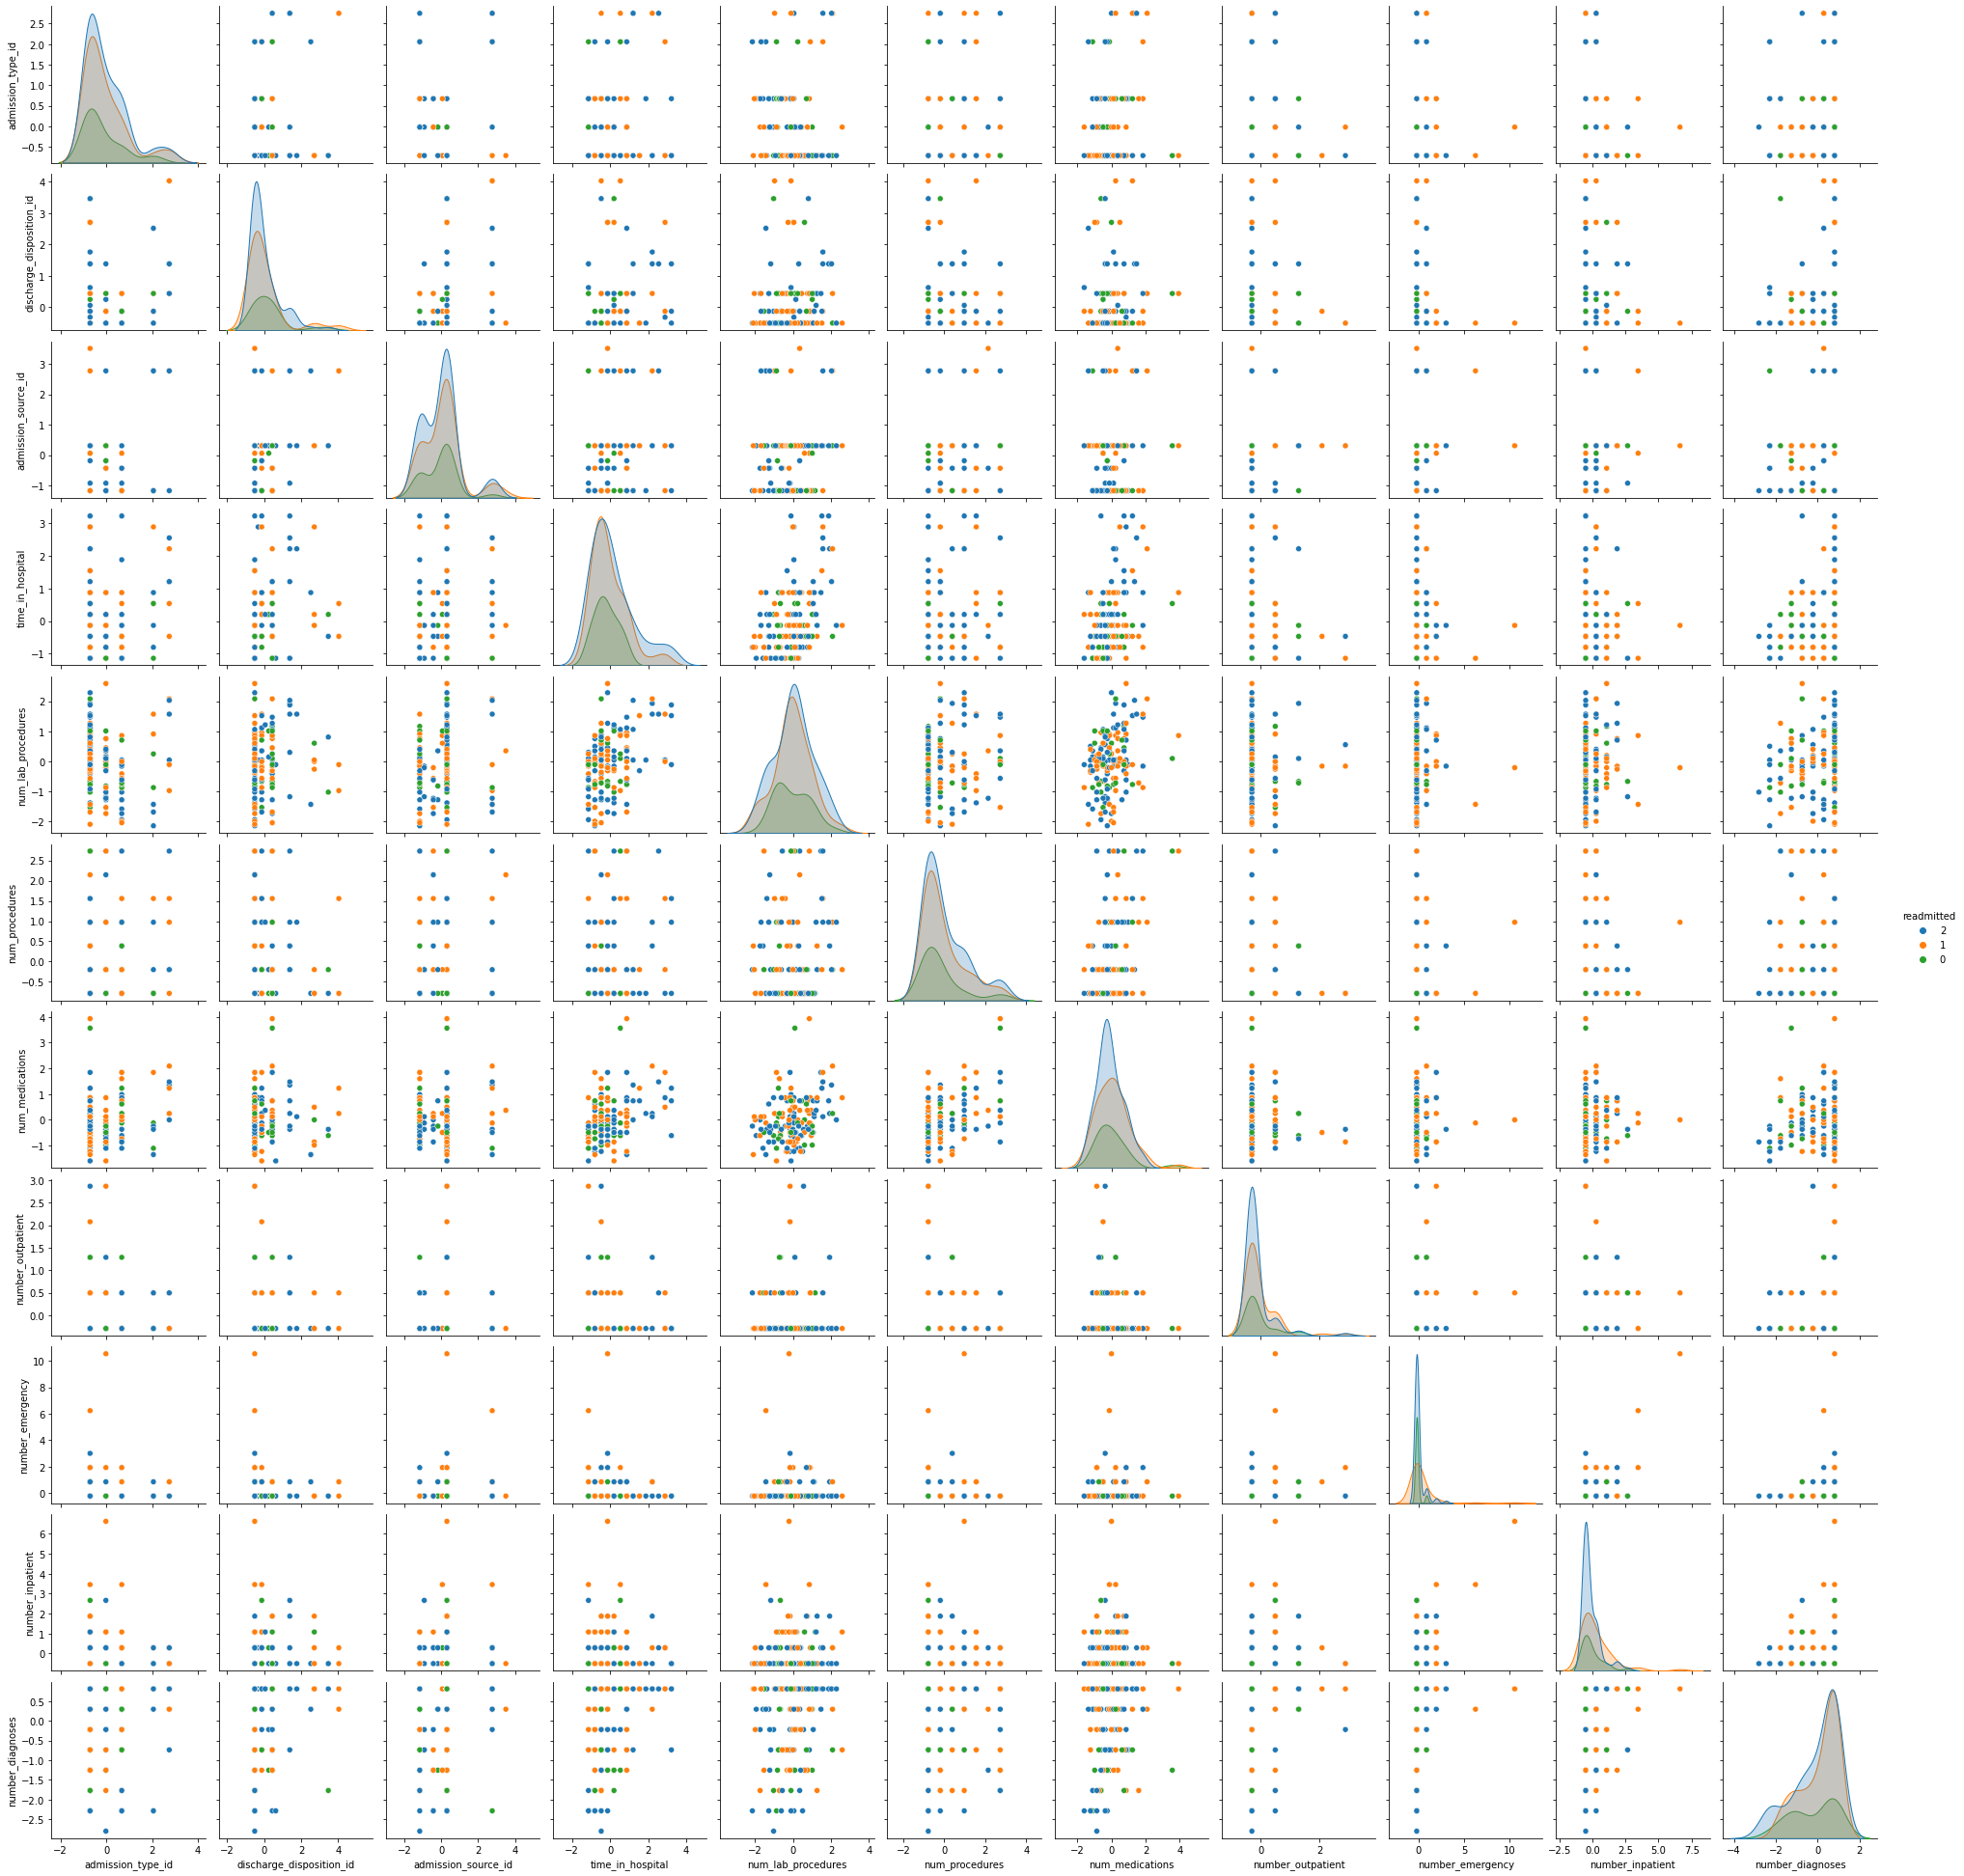

In [70]:
sns.pairplot(data.sample(n=150, random_state=1), hue=LABEL)

In [71]:
target = data.pop(LABEL)
target

0         2
1         1
2         2
3         2
4         2
         ..
101761    1
101762    2
101763    2
101764    2
101765    2
Name: readmitted, Length: 101766, dtype: category
Categories (3, int64): [2, 1, 0]

In [72]:
data = pd.get_dummies(data, dtype="float32")
data

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glimepiride_pioglitazone_0,glimepiride_pioglitazone_1,metformin_rosiglitazone_0,metformin_rosiglitazone_1,metformin_pioglitazone_0,metformin_pioglitazone_1,change_1,change_0,diabetes_med_0,diabetes_med_1
0,2.750799,4.031022,-1.169873,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.708461,-0.514313,0.306482,-0.467653,0.808384,-0.785398,0.243390,-0.291461,-0.21262,-0.503276,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,-0.708461,-0.514313,0.306482,-0.802651,-1.631351,2.145781,-0.371804,1.286748,-0.21262,0.288579,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.708461,-0.514313,0.306482,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,-0.21262,-0.503276,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.708461,-0.514313,0.306482,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,-0.21262,-0.503276,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,-0.708461,-0.135535,0.306482,-0.467653,0.401761,-0.785398,-0.002688,-0.291461,-0.21262,-0.503276,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
101762,-0.708461,0.053854,-0.185636,0.202343,-0.513139,0.973309,0.243390,-0.291461,-0.21262,0.288579,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
101763,-0.708461,-0.514313,0.306482,-1.137649,0.503417,-0.785398,-0.863958,0.497643,-0.21262,-0.503276,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
101764,-0.016609,-0.135535,0.306482,1.877333,0.096794,0.387074,0.612506,-0.291461,-0.21262,0.288579,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [73]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
train = train.batch(BATCH_SIZE)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
test = test.batch(BATCH_SIZE)